In [21]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import math
#import statsmodels
import statsmodels.api as sm

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Question 3: Try to reproduce the three charts in figure 1 of the paper.

First, we want to set up the data from raw data. We define rate of range of CPI as 
$$ \text{rate of change} = \frac {CPI_{t} - CPI_{t-1}}{CPI_{t-1}} $$

In [3]:
data = pd.read_excel('Phillips.xls')
data

,Time,CPILFESL,UNRATE,COMPNFB,GDPDEF,ULCNFB,Unemployment Gap
0,1980-01-01,0.009613,7.2,0.027,0.023,0.025,0.012
1,1981-01-01,0.007627,7.6,0.020,0.021,0.020,0.016
2,1982-01-01,0.003693,9.7,0.016,0.013,0.015,0.037
3,1983-01-01,0.003861,9.6,0.009,0.008,-0.002,0.036
4,1984-01-01,0.004004,7.5,0.011,0.009,0.007,0.015
5,1985-01-01,0.003521,7.2,0.014,0.007,0.008,0.012
6,1986-01-01,0.003089,7.0,0.013,0.005,0.007,0.010
7,1987-01-01,0.003397,6.2,0.008,0.007,0.005,0.002
8,1988-01-01,0.003796,5.5,0.012,0.010,0.010,-0.005
9,1989-01-01,0.003631,5.3,0.008,0.009,0.005,-0.007


Text(0.5,1,'Unemployment and Total Compensation')

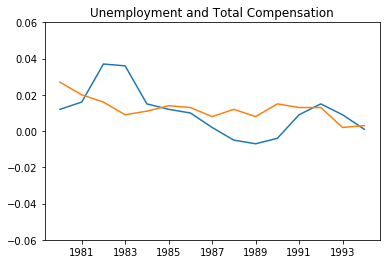

In [6]:
plt.plot(data['Time'], data['Unemployment Gap']) 
plt.plot(data['Time'], data['COMPNFB']) 
plt.ylim(-0.06,0.06)
plt.title('Unemployment and Total Compensation')

Text(0.5,1,'Unemployment and Core CPI')

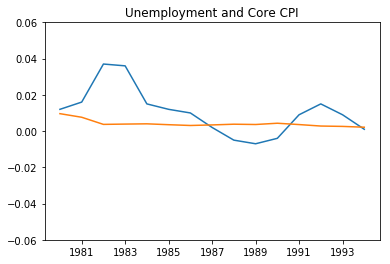

In [7]:
plt.plot(data['Time'], data['Unemployment Gap']) 
plt.plot(data['Time'], data['CPILFESL']) 
plt.ylim(-0.06,0.06)
plt.title('Unemployment and Core CPI')

Text(0.5,1,'Unemployment and GDP Deflator')

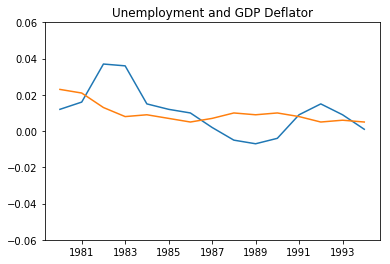

In [8]:
plt.plot(data['Time'], data['Unemployment Gap']) 
plt.plot(data['Time'], data['GDPDEF']) 
plt.ylim(-0.06,0.06)
plt.title('Unemployment and GDP Deflator')

My charts don't match with the paper exactly, but the general shapes agree.

# Question 4: The author wants to make the point that the unemployment gap (positive when unemployment is higher that its natural level, negative when it is below its natural level) is approximately equal to the change in inflation rate but with opposite sign. Does figure 1 support that point? Does your reconstruction of figure 1 support that point?

Figure 1 in the paper supports the point. My reconstruction partly supports the point since when unemployment gao increases, inflation rate decreases, but changes are not equal.

# Question 5: Now do the same three charts from 1995 to 2018. Do these charts support the author's point?

Text(0.5,1,'Unemployment and Total Compensation')

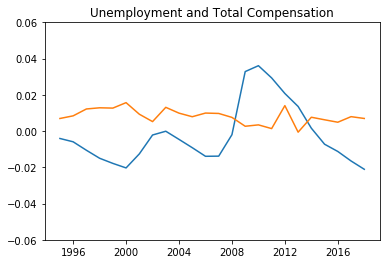

In [4]:
data2 = pd.read_excel('Phillips2.xls')
plt.plot(data2['Time'], data2['Unemployment Gap']) 
plt.plot(data2['Time'], data2['COMPNFB']) 
plt.ylim(-0.06,0.06)
plt.title('Unemployment and Total Compensation')

Text(0.5,1,'Unemployment and Core CPI')

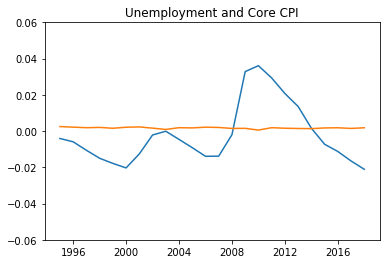

In [5]:
plt.plot(data2['Time'], data2['Unemployment Gap']) 
plt.plot(data2['Time'], data2['CPILFESL']) 
plt.ylim(-0.06,0.06)
plt.title('Unemployment and Core CPI')

Text(0.5,1,'Unemployment and GDP Deflator')

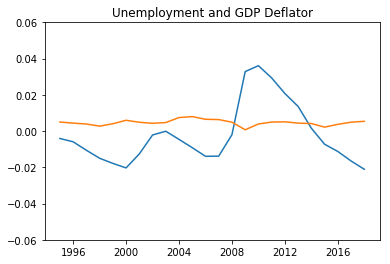

In [6]:
plt.plot(data2['Time'], data2['Unemployment Gap']) 
plt.plot(data2['Time'], data2['GDPDEF']) 
plt.ylim(-0.06,0.06)
plt.title('Unemployment and GDP Deflator')

Total compensation inflation rate agrees with the author's point; other two plots don't.

# Question 6: Next recreate the regression in table 1 of the paper. 
What do you think of this regression? Are the results reliable? What are they telling you? Do they support the author's contention that low unemployment leads to higher inflation? How about the contention that independent of the level of inflation, decreasing unemployment leads to higher inflation? Divide the constant term by the sum of the two unemployment coefficients. Is this a good way to estimate the “non-accelerating-inflation rate of unemployment” or NAIRU?

In [39]:
data3 = pd.read_excel('Phillips3.xls')
data3.head()

,DATE,CPILFESL,UNRATE,WTISPLC,DeltaP,Unrate,DeltaOil
0,1960-01-01,30.5,5.2,2.97,0.0,0.052,0.0
1,1960-02-01,30.6,4.8,2.97,0.1,0.048,0.0
2,1960-03-01,30.6,5.4,2.97,0.0,0.054,0.0
3,1960-04-01,30.6,5.2,2.97,0.0,0.052,0.0
4,1960-05-01,30.6,5.1,2.97,0.0,0.051,0.0


In [123]:
#build regression model 
PT = data3["CPILFESL"][12:408]
P1 = data3["CPILFESL"][11:407]
P2 = data3["CPILFESL"][10:406]
P3 = data3["CPILFESL"][9:405]
P4 = data3["CPILFESL"][8:404]
P5 = data3["CPILFESL"][7:403]
P6 = data3["CPILFESL"][6:402]
P7 = data3["CPILFESL"][5:401]
P8 = data3["CPILFESL"][4:400]
P9 = data3["CPILFESL"][3:399]
P10 = data3["CPILFESL"][2:398]
P11 = data3["CPILFESL"][1:397]
P12 = data3["CPILFESL"][0:396]
U1 = data3["UNRATE"][11:407]
U2 = data3["UNRATE"][10:406]
PO = data3["DeltaOil"][12:408]
Dependent_variable= [[PT,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,U1,U1,PO]]
Dependent_variable = pd.DataFrame(Dependent_variable)
Dependent_variable.columns = ['PT','P1', 'P2','P3','P4','P5','P6','P7','P8','P9','P10','P11','P12','U1','U2''PO']

Dependent_variable = sm.add_constant(Dependent_variable)
X=['P1', 'P2','P3','P4','P5','P6','P7','P8','P9','P10','P11','P12','U1','U2''PO']
reg = sm.OLS(endog=Dependent_variable['PT'], exog=Dependent_variable[X]).fit()

#xvars = ["const", "t1","t2","t3","t4","t5","t6","t7","t8","t9","t10","t11","t12","unrate1","unrate2","d_oil_price_rate"]
#reg1 = sm.OLS(endog=regression_data1['t0'], exog=regression_data1[xvars]).fit()
#data3


ValueError: Length mismatch: Expected axis has 16 elements, new values have 15 elements